# Project Group - 33

Members: Amber van der Helm, Femke Tamsma, Merel Loman, Naomi Rottier, and Robin Karthaus

Student numbers: 5164303, 5122422, 4852982, 5496462, 5634563

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

The bin packing is an Operational Research (OR) technique. It is similar to the knapsack problem, however the knapsack problem is a maximization problem where the purpose is to fill a fixed-size knapsack with the most valuable items. Whereas in the bin packing problem all items should be assigned and the purpose is to minimize the number of used bins. 

Throughout the supply chain various applications can be found where a bin packing problem is encountered. From assigning cargo to airplanes or containers to assigning packages to trucks. 

The objective for this research is a model that is able to optimize the allocation of packages to vehicles. This is first done with one type of vehicle with the same characteristics. From this model the model will be extended so it can optimize the same problem with different types of vehicles that can be used and eventually the emissions of the vehicles will be considered as well. Even more applications can be added to extend the model to become more realistic. An example is not allocating all packages from one day but to differentiate in parts of the day and that packages from certain time slots are used, instead of all packages available.  

The data set from the "Amazon Last Mile Routing Challenge Dataset" will be used. This data contains information about the dimension of the packages being delivered. The data will first be imported to Python and converted from a JSON file to a CSV file. Missing values will either be deleted or replaced by the average values, depending on the outcomes of the descriptive analysis. To simplify the model, the three dimensions (length, width, height), will be converted to a new variable (column) "volume" in cm3. Since the dimension of the vans is also in cm3, optimizing the bin packing algorithm will be possible. After these first data processing steps, the data will be further cleaned by checking for outliers and deleting these if necessary. Also a general view of the data will be formed by descriptive statistics and corresponding visualizations (box plots, normal distributions, histograms, scatter plots, etc.). 

When all the data is cleaned and a general view of the data is formed the algorithm will be written. This algorithm will be a bin packing algorithm which optimizes the allocation/loading of the vans. This algorithm will be written in different steps. First many assumptions will be made to keep the algorithm as simple as possible (for example, only one van at a time can be loaded). When the model runs correctly, the algorithm will be made more complex by adding more constraints and making less assumptions. Each "complexity step" in the model will be monitored separately and give insight into the capacity of the model of optimizing the loading more optimally. A visualization regarding the decrease in total needed vans per increase in model complexity will be created. 

The research question used in this assignment is: "Is it possible to optimize the allocation of packages, given by the Amazon dataset, to vans using a binpacking algorithm, where model complexity steps are taken into account and visualization of these complexity steps are done with advanced visualisation?"

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1** (Amber): importing data as a dataframe

**Author 2** (Femke): visualization possibilities 

**Author 3** (Merel): importing data as a dataframe

**Author 4** (Naomi): checking other projects and RQs

**Author 5** (Robin): visualization possibilities

# Data Import

We have used two datasets from Amazon to get the dimensions of the packages and delivery vans. The first dataset "package_data.json" gives us information about the dimensions of the packages, which will be used to compute the volume for each package. The second dataset "route_data.json" will be used to obtain the volume capacity of th delivery vehicle. More documentation can be found here: https://github.com/MIT-CAVE/rc-cli/blob/main/templates/data_structures.md. 

First, the necessary libraries will be imported and these two datasets will be opened before creating the dataframe.

In [12]:
import pandas as pd
import json
import matplotlib.pyplot as plt

json_file_path_package = 'package_data.json'

with open(json_file_path_package, 'r') as file:
    data_package = json.load(file)

json_file_path_route = 'route_data.json'

with open(json_file_path_route, 'r') as file:
    data_route = json.load(file)

After loading our datasets, it is stored in a way that we can use it for our research question. First, the json data of the packages will be put in a dataframe.

In [13]:
# Initialize empty lists for each column
package_ids = []
scan_statuses = []
start_times = []
end_times = []
service_times = []
depths = []
heights = []
widths = []
stop_ids = []
route_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_package.items():
    for stop_id, stop_data in route_data.items():
        for package_id, package_data in stop_data.items():
            package_ids.append(package_id)
            scan_statuses.append(package_data.get("scan_status", ""))
            time_window = package_data.get("time_window", {})
            start_times.append(time_window.get("start_time_utc", ""))
            end_times.append(time_window.get("end_time_utc", ""))
            service_times.append(package_data.get("planned_service_time_seconds", ""))
            dimensions = package_data.get("dimensions", {})
            depths.append(dimensions.get("depth_cm", ""))
            heights.append(dimensions.get("height_cm", ""))
            widths.append(dimensions.get("width_cm", ""))
            stop_ids.append(stop_id)
            route_ids.append(route_id)

# Create a pandas DataFrame from the extracted data
df_package = pd.DataFrame({
    "PackageID": package_ids,
    "ScanStatus": scan_statuses,
    "StartTimeUTC": start_times,
    "EndTimeUTC": end_times,
    "PlannedServiceTimeSeconds": service_times,
    "DepthCM": depths,
    "HeightCM": heights,
    "WidthCM": widths,
    "StopID": stop_ids,
    "RouteID": route_ids
})

# Display the resulting DataFrame
df_package.head(5)


,PackageID,ScanStatus,StartTimeUTC,EndTimeUTC,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM,StopID,RouteID
0,PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea,DELIVERED,NaN,NaN,59.3,25.4,7.6,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
1,PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,59.3,25.4,12.7,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
2,PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07,DELIVERED,NaN,NaN,59.3,39.4,7.6,31.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
3,PackageID_15c6a204-ec5f-4ced-9c3d-472316cc7759,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,27.0,30.0,3.0,27.4,AF,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
4,PackageID_3b28f781-242e-416e-9575-84c7188b8208,DELIVERED,NaN,NaN,45.0,25.4,12.7,17.8,AG,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77


Now that the data of the packages is loaded into a dataframe, the second json file will be converted to a dataframe in order to get useful route data.  

In [3]:
# Initialize empty lists for each column
route_ids = []
station_codes = []
dates = []
departure_times = []
executor_capacities = []
route_scores = []
stop_ids = []
lats = []
lngs = []
types = []
zone_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_route.items():
    station_code = route_data.get("station_code", "")
    date = route_data.get("date_YYYY_MM_DD", "")
    departure_time_utc = route_data.get("departure_time_utc", "")
    executor_capacity_cm3 = route_data.get("executor_capacity_cm3", "")
    route_score = route_data.get("route_score", "")
    
    stops = route_data.get("stops", {})
    for stop_id, stop_data in stops.items():
        lat = stop_data.get("lat", "")
        lng = stop_data.get("lng", "")
        stop_type = stop_data.get("type", "")
        zone_id = stop_data.get("zone_id", "")
        
        route_ids.append(route_id)
        station_codes.append(station_code)
        dates.append(date)
        departure_times.append(departure_time_utc)
        executor_capacities.append(executor_capacity_cm3)
        route_scores.append(route_score)
        stop_ids.append(stop_id)
        lats.append(lat)
        lngs.append(lng)
        types.append(stop_type)
        zone_ids.append(zone_id)

# Create a pandas DataFrame from the extracted data
df_route = pd.DataFrame({
    "RouteID": route_ids,
    "station_code": station_codes,
    "date_YYYY_MM_DD": dates,
    "departure_time_utc": departure_times,
    "executor_capacity_cm3": executor_capacities,
    "route_score": route_scores,
    "stop_id": stop_ids,
    "lat": lats,
    "lng": lngs,
    "type": types,
    "zone_id": zone_ids
})

# Display the resulting DataFrame
df_route.head(5)


,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stop_id,lat,lng,type,zone_id
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AD,34.099611,-118.283062,Dropoff,P-12.3C
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AF,34.101587,-118.291125,Dropoff,A-1.2D
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AG,34.089727,-118.285530,Dropoff,A-2.1A
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BA,34.096132,-118.292869,Dropoff,A-1.2C
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BE,34.098482,-118.286243,Dropoff,P-13.3B


# Data Pipeline

### Data Cleaning

Before implementing our algorithms, the raw data must be cleaned. For the first dataset "package_data" the dimensions must have a value in order to compute the volume. Therefore, we have to check if NaN values exist for these data fields and if so, replace the NaN value with the mean of the data field. This is also necessary for the volume capacity of the delivery vehicles in the second dataset "route_data". As one can see in the code below, there are no missing values for each data field. 

In [ ]:
# Code van Merel over de missing values hier.

### Data Distribution

Now that the data is cleaned, the data distribution can be displayed. First of all, the distribution of the volume of the packages is presented. 

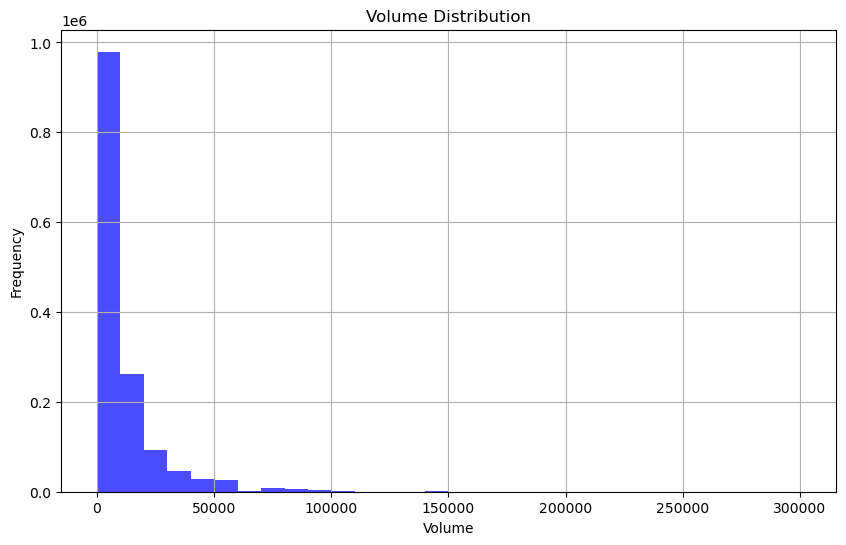

In [16]:
# Add a column named package_volume by multiplying DepthCM, HeightCM and WidthCM
df_package['package_volume'] = (df_package['DepthCM'] * df_package['HeightCM'] * df_package['WidthCM'])

plt.figure(figsize=(10, 6))
plt.hist(df_package['package_volume'], bins=30, color='blue', alpha=0.7)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()